In [1]:
%matplotlib notebook
import sklearn.decomposition as skd
import numpy as np
import matplotlib.pyplot as plt
import time
import tifffile as tf
import warnings
warnings.filterwarnings('ignore')




In [2]:
t = tf.imread('//169.254.8.100/public/testData/HCT3-colorTEST.tif')
t = np.transpose(t,axes=[2,3,0,1])
inputImage = t.astype(np.float)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\169.254.8.100\\public\\testData\\HCT3-colorTEST.tif'

In [ ]:
plt.figure()
plt.imshow(np.max(inputImage[:,:,:,3], axis = 2))


<IPython.core.display.Javascript object>


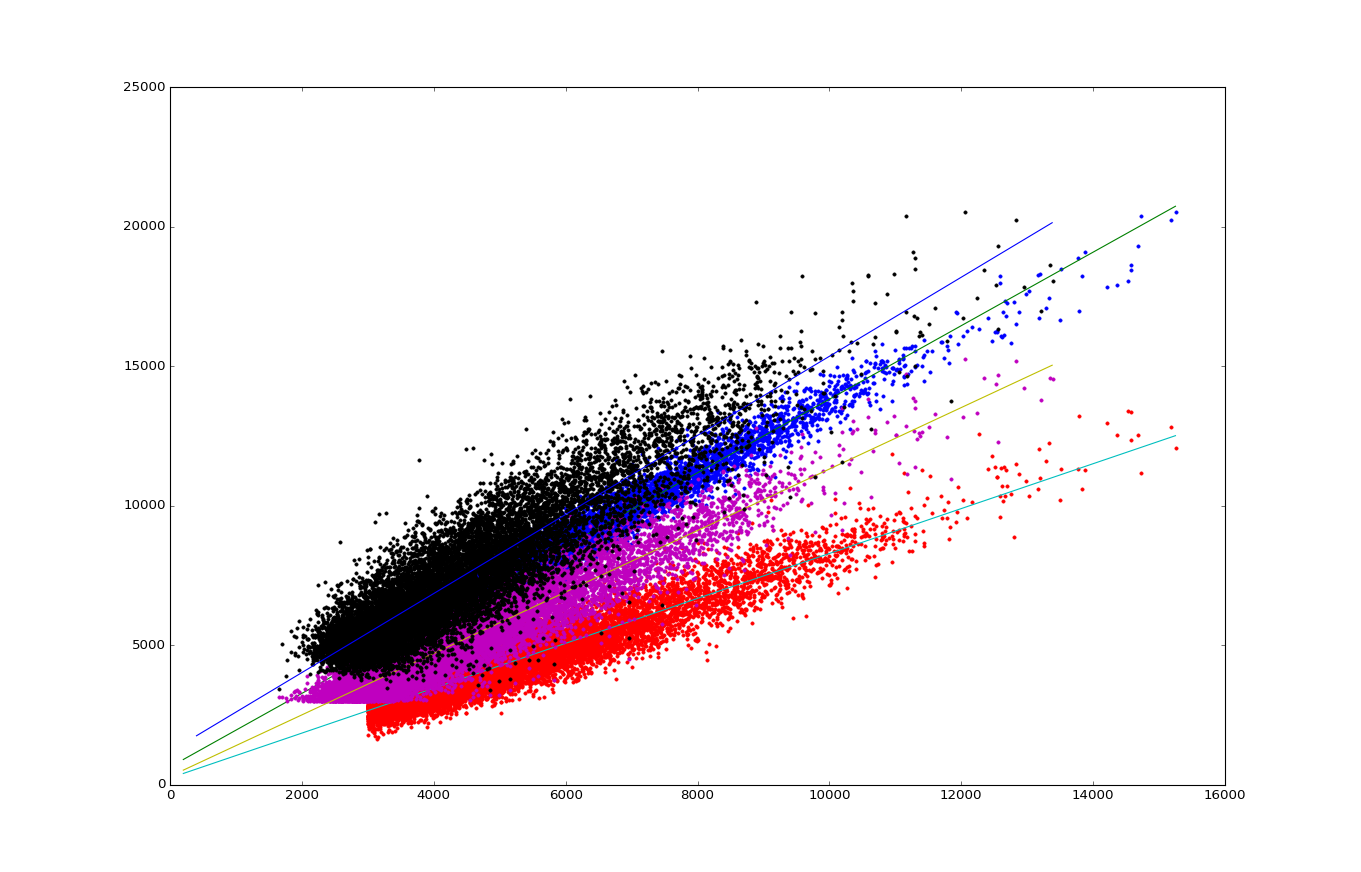

[   0.80439567  244.92011972]
[   1.3174558   642.78375217]
[   1.10104649  304.96799466]
[    1.41649199  1190.74078356]


In [23]:
plt.figure()
# do a linear fit 
subset1 = inputImage[::4,::4,:,1].flatten()
subset2 =  inputImage[::4,::4,:,2].flatten()
subset0 = inputImage[::4,::4,:,0].flatten()
subset0 = subset0[subset1>3000]

subset2 = subset2[subset1>3000]
subset1 = subset1[subset1>3000]


coeffs12 = np.polyfit( subset1.astype(float),  subset2.astype(float), 1)
plt.plot(subset1,subset2,'.')
polyLine12 = np.poly1d(coeffs12)
a = np.arange(200,np.max(subset1),10);
plt.plot(a, polyLine12(a))


coeffs10 = np.polyfit( subset1.astype(float),  subset0.astype(float), 1)
plt.plot(subset1,subset0,'.')
polyLine10 = np.poly1d(coeffs10)
a = np.arange(200,np.max(subset1),10);
plt.plot(a, polyLine10(a))


coeffs01 = np.polyfit( subset0.astype(float),  subset1.astype(float), 1)
plt.plot(subset0,subset1,'.')
polyLine01 = np.poly1d(coeffs01)
a = np.arange(200,np.max(subset0),10);
plt.plot(a, polyLine01(a))


coeffs02 = np.polyfit( subset0.astype(float),  subset2.astype(float), 1)
plt.plot(subset0,subset2,'.')
polyLine02 = np.poly1d(coeffs02)
a = np.arange(400,np.max(subset0),10);
plt.plot(a, polyLine02(a))



plt.show()

print(coeffs10)
print(coeffs12)
print(coeffs01)
print(coeffs02)




In [22]:
# based on these linear fits to the bright pixels which we associate with lipofuscin,
# we estimate some values for the mixing matrix
c0 = [.8, 1., 1.3 ] #  lipofuscin
c1 = [0, 1, 0.05, 0]  #  Alexa 488
c2 = [0, 0, 1, 0.01]  #  Alexa 561
c3 = [0,0,0,1]       # Alexa 650  (or whatever)
#  there is actually an additional low-level autofluorescence present in ALL channels that should be its own label...
c4 = []

# and once we normalize the channel weights for each label, we have our dictionary

lipofuscin = lipofuscin/np.sqrt(np.dot(lipofuscin,lipofuscin))

c0 = c0/np.sqrt(np.dot(c0,c0))
c1 = c1/np.sqrt(np.dot(c1,c1))
c2 = c2/np.sqrt(np.dot(c2,c2))
c3 = c3/np.sqrt(np.dot(c3,c3))
testDict =np.array([lipofuscin,
c0,
c1,
c2,
c3])
print testDict

[[ 0.          0.37420784  0.79519166  0.477115  ]
 [ 1.          0.          0.          0.        ]
 [ 0.          0.99875234  0.04993762  0.        ]
 [ 0.          0.          0.99995     0.0099995 ]
 [ 0.          0.          0.          1.        ]]


0.001
Fri Aug 19 12:43:23 2016
Fri Aug 19 13:13:07 2016
0.1
Fri Aug 19 13:13:08 2016
Fri Aug 19 13:26:38 2016
0.5
Fri Aug 19 13:26:39 2016
Fri Aug 19 13:40:17 2016
1.0
Fri Aug 19 13:40:18 2016
Fri Aug 19 13:53:28 2016
2.0
Fri Aug 19 13:53:29 2016
Fri Aug 19 14:06:41 2016


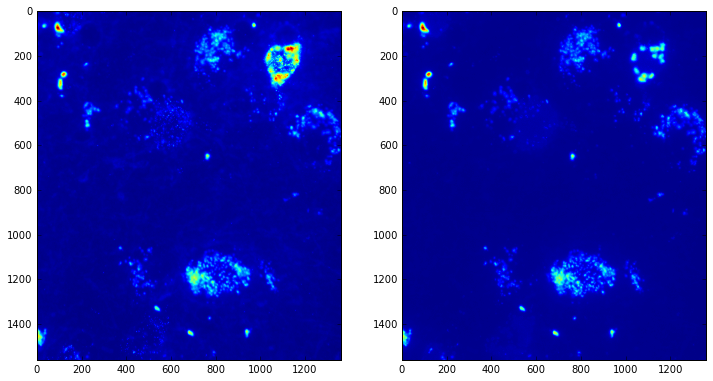

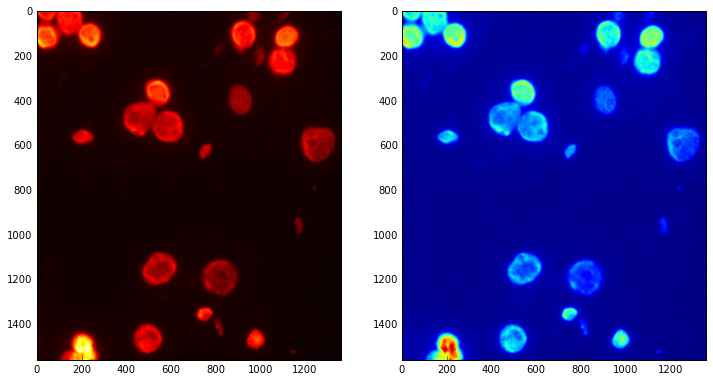

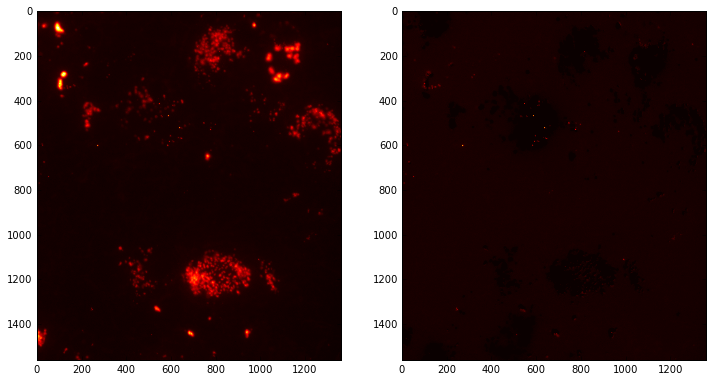

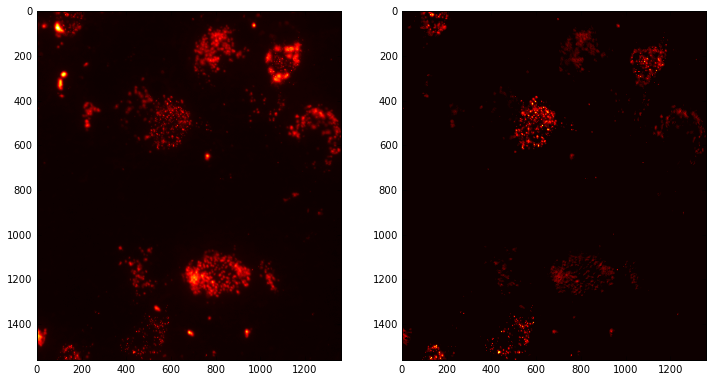

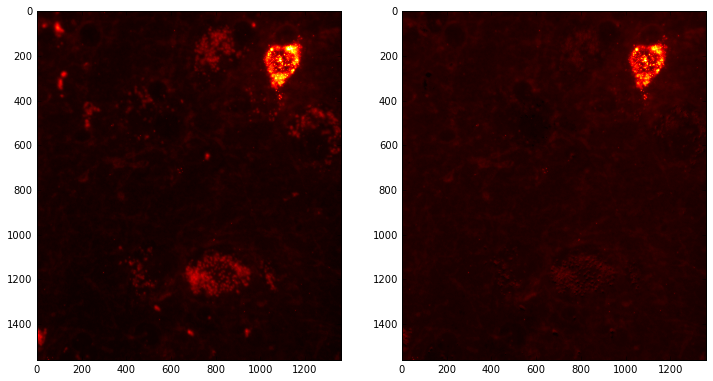

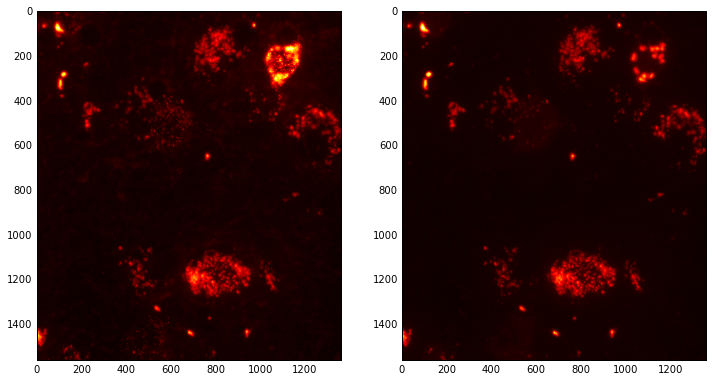

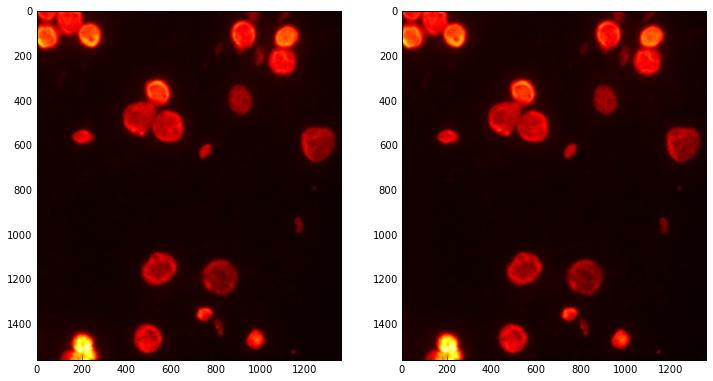

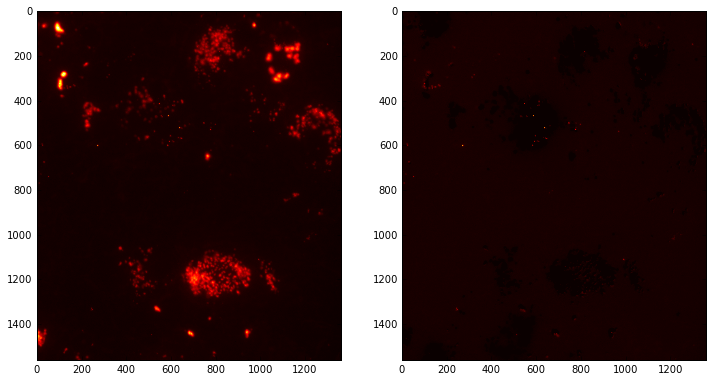

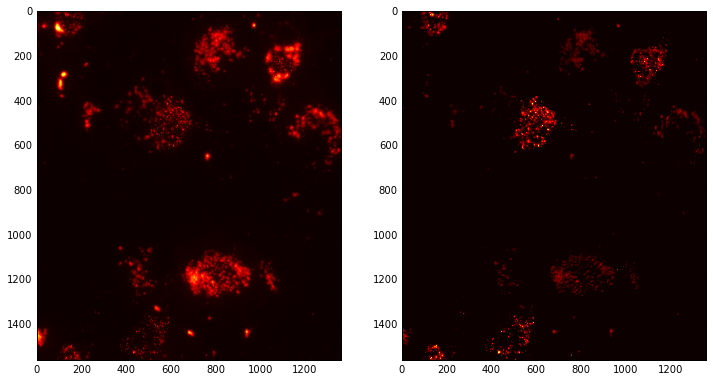

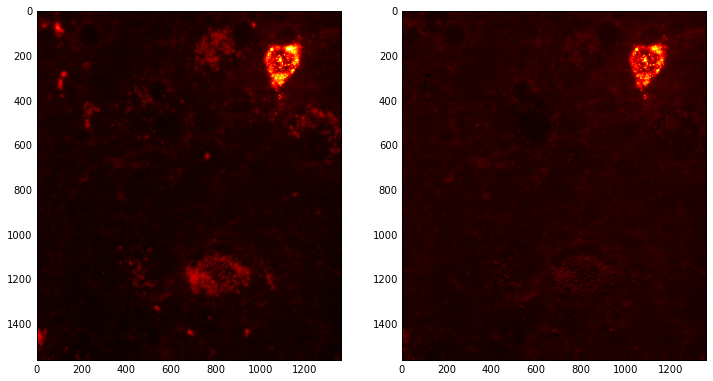

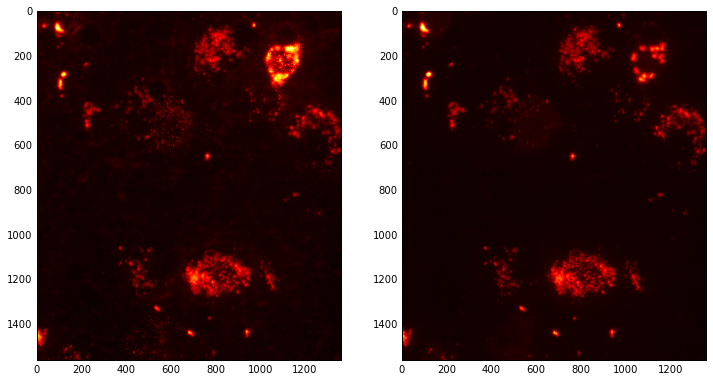

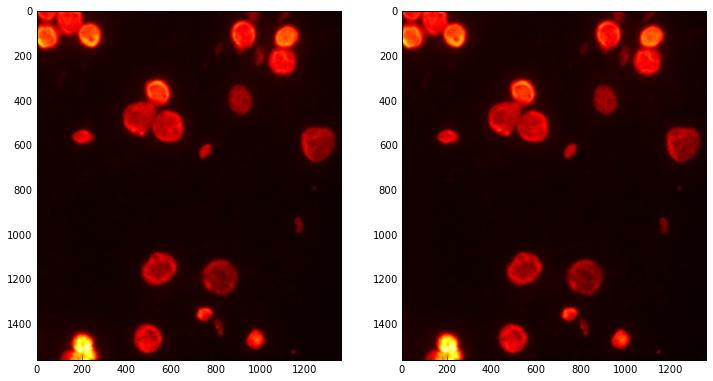

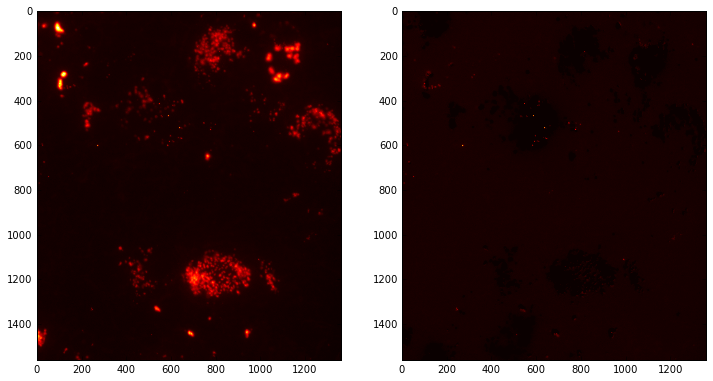

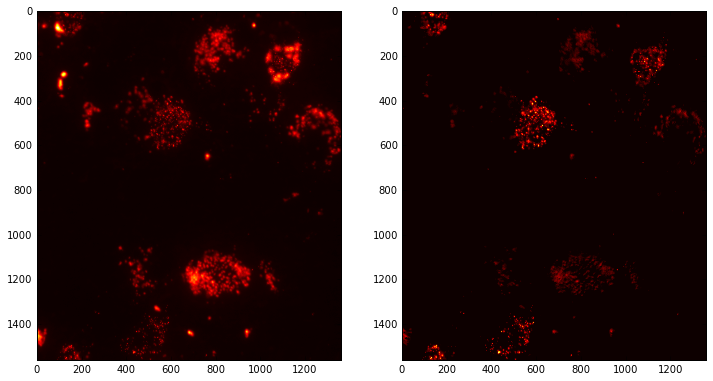

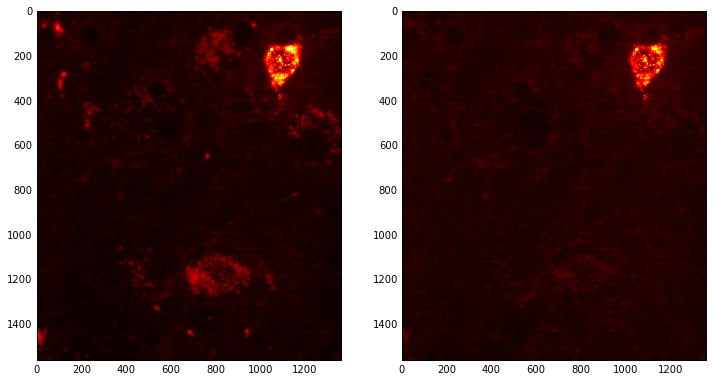

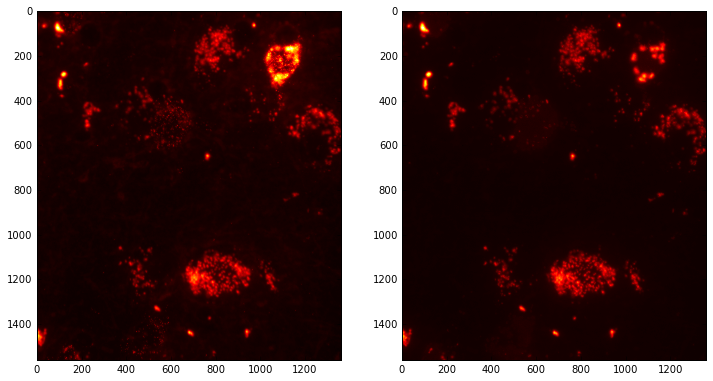

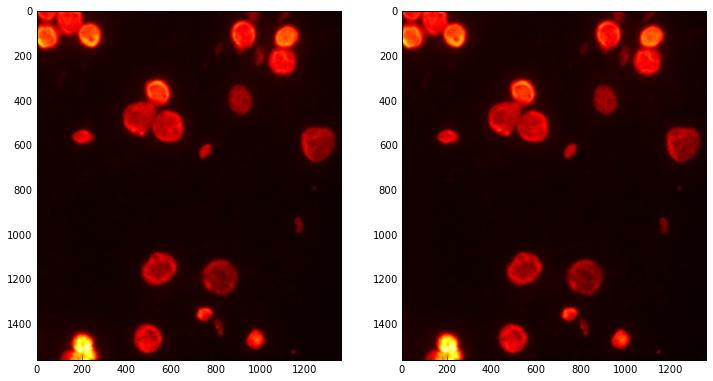

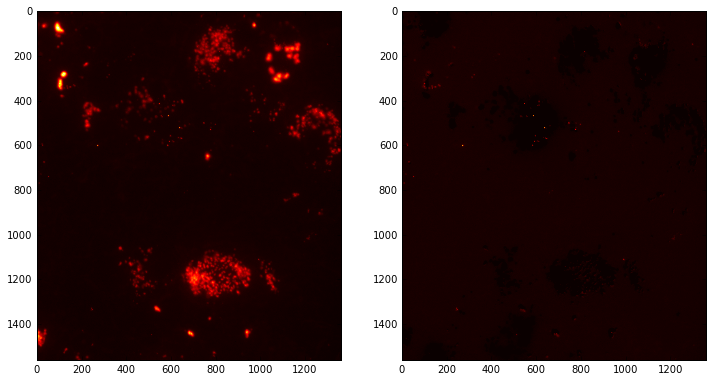

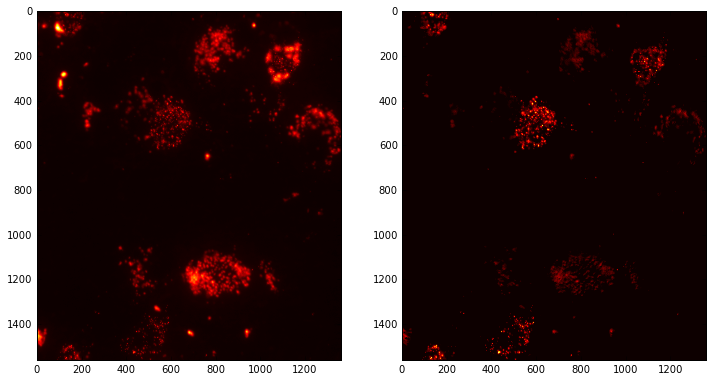

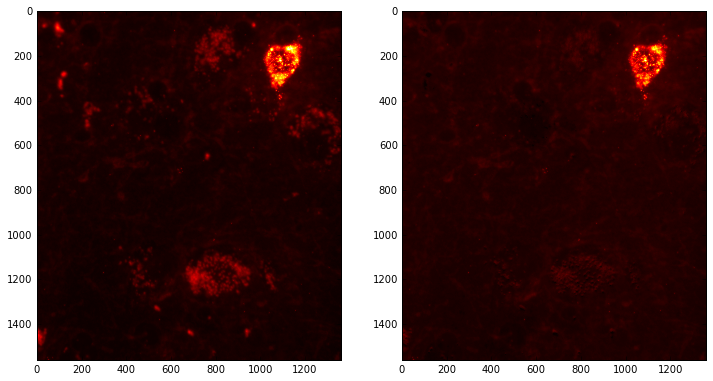

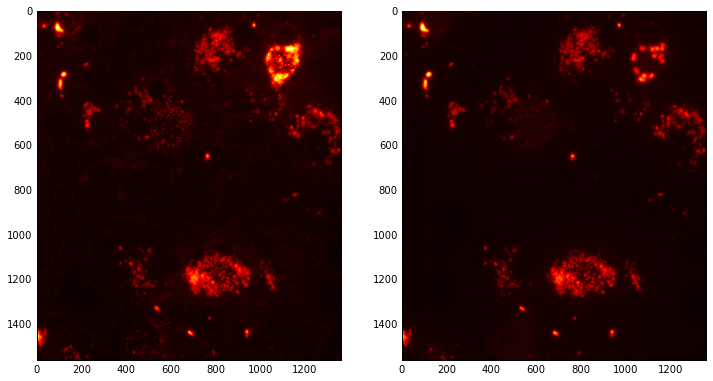

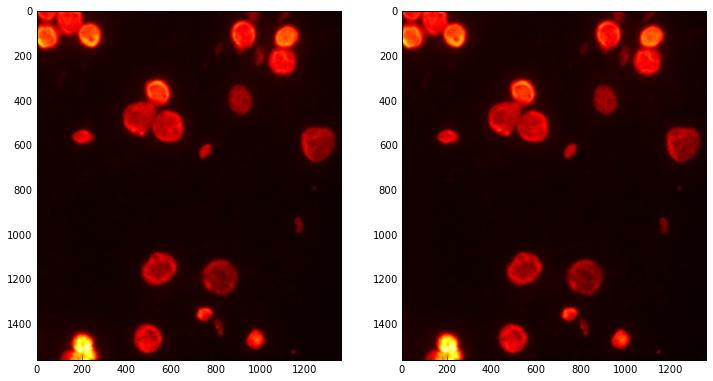

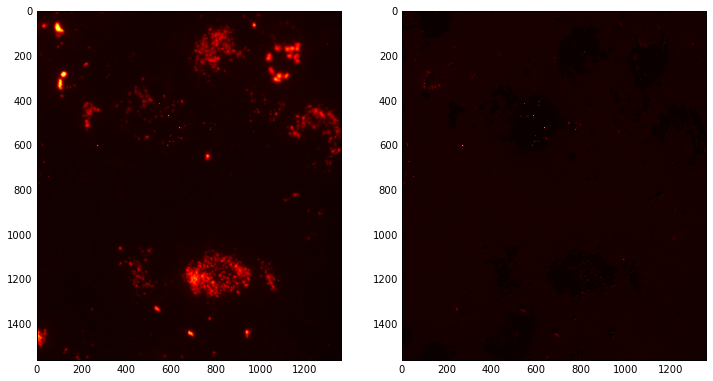

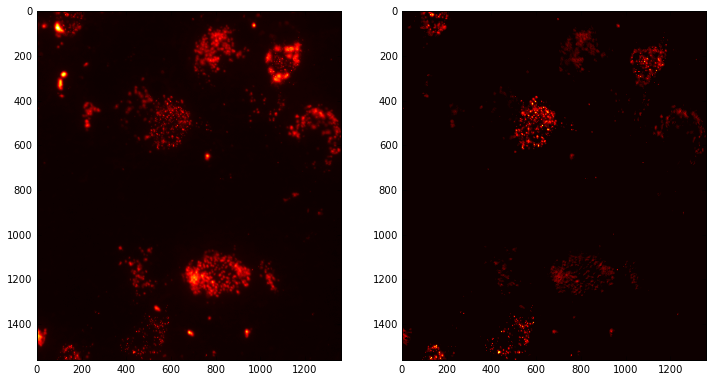

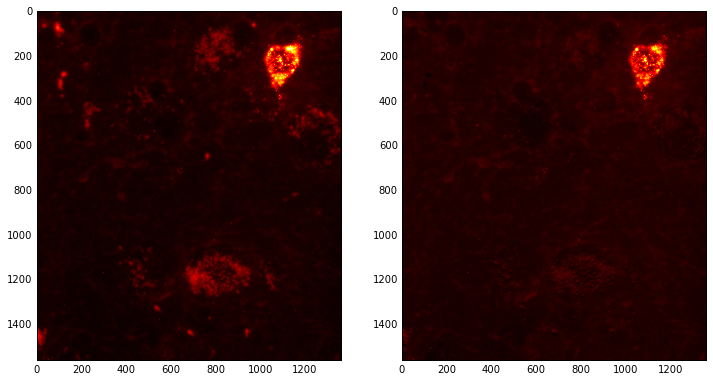

In [28]:
alphaList =[0.001,  0.1, 0.5,  1.0,2.0]
inputArray = inputImage.reshape(inputImage.shape[0]*inputImage.shape[1],4)
for alpha in alphaList: 
    print alpha
    print time.ctime()
    mySparseCoder= skd.SparseCoder(testDict, transform_algorithm='lasso_lars', transform_alpha = alpha, n_jobs = 4)
#  the fit_transform method for this class doesn't do any fitting because
# the transform is based on the fixed input dictionary
    transformedData =mySparseCoder.fit_transform(inputArray)
    tData = transformedData.reshape(inputImage.shape[0], inputImage.shape[1],5)
    tData = tData-tData.min()
    intData = tData.astype(np.uint16)
    print time.ctime()
    tf.imsave("/Users/brianl/data/smFISHtesting/moreTests_alpha"+np.str(alpha)+"_.tif", intData[:,:,0:4])
    tf.imsave("/Users/brianl/data/smFISHtesting/moreTests_alpha"+np.str(alpha)+"_b.tif", intData[:,:,4])
    for i in np.arange(0,5):
        plt.figure(figsize=(width, height))
        plt.subplot(1,2,2)
        plt.imshow(tData[:,:,i])
        if i==0:
            plt.subplot(1,2,1)

            plt.imshow(inputImage[:,:,1]+inputImage[:,:,2]+inputImage[:,:,3])
        elif i==1:

            plt.subplot(1,2,1)

            plt.imshow(inputImage[:,:,0])
            plt.hot()
        else:
            plt.subplot(1,2,1)

            plt.imshow(inputImage[:,:,i-1])



In [68]:
print tData.min()
print tData.max()

0.0
65676.2818884


In [26]:
intData = tData.astype(np.uint16)

NameError: name 'tData' is not defined

In [73]:
intDataR = intData.reshape(5, 1362, 1560)

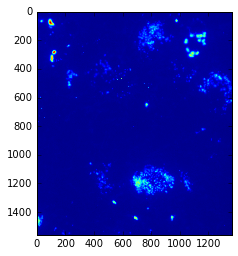

In [25]:
plt.imshow(inputImage[:,:,1])

In [77]:
tf.imsave("/Users/brianl/data/smFISHtesting/moreTests01.tif", intData[:,:,0:4])
tf.imsave("/Users/brianl/data/smFISHtesting/moreTests01_5.tif", intData[:,:,4])

In [58]:
whos

Variable          Type             Data/Info
--------------------------------------------
Image             module           <module 'PIL.Image' from <...>-packages/PIL/Image.pyc'>
alpha             float            2.0
alphaList         list             n=5
c0                ndarray          4: 4 elems, type `float64`, 32 bytes
c1                ndarray          4: 4 elems, type `float64`, 32 bytes
c2                ndarray          4: 4 elems, type `float64`, 32 bytes
c3                ndarray          4: 4 elems, type `float64`, 32 bytes
cdata             ndarray          1560x1362x4: 8498880 elems, type `uint16`, 16997760 bytes (16 Mb)
colordata         ndarray          1560x1362: 2124720 elems, type `uint16`, 4249440 bytes (4 Mb)
fData             ndarray          1560x1362x4: 8498880 elems, type `float64`, 67991040 bytes (64 Mb)
height            int              12
i                 int64            4
im                TiffImageFile    <PIL.TiffImagePlugin.Tiff<...>1362x1560 at 